In [1920]:
import pandas as pd
import matplotlib.pyplot as plt

hc_label = "HC (kVA)"
ctpv_label = "CTPV (Milhões de USD)"


In [1921]:
def parser_pareto(path: str) -> pd.DataFrame:
    lines = []
    with open(path, "r") as file:
        lines = file.readlines()

    out = {hc_label: [], ctpv_label: [] }
    for line in lines:
        if "Pareto | HC" in line:
            tokens = line.split()
            out["HC (kVA)"].append(float(tokens[-1])*1e3)
        elif "Pareto | CTPV" in line:
            tokens = line.split()
            out["CTPV (Milhões de USD)"].append(float(tokens[-1])/1e6)
    return pd.DataFrame(data=out)
        





In [1922]:
df_both = parser_pareto("../../info_mult_24_both.log")
df_ev = parser_pareto("../../info_mult_24_ev.log")
df_gen = parser_pareto("../../info_mult_24_gen.log")

In [1923]:
df_both

,HC (kVA),CTPV (Milhões de USD)
0,783.998216,251.650532
1,672.664994,251.369648
2,635.998364,250.663997
3,635.996728,250.662652
4,519.998480,250.646565
5,452.258548,250.615080
6,279.998720,250.366124
7,265.000000,250.309555
8,119.998880,250.298673


In [1924]:
len(df_both)

9

## CTPV

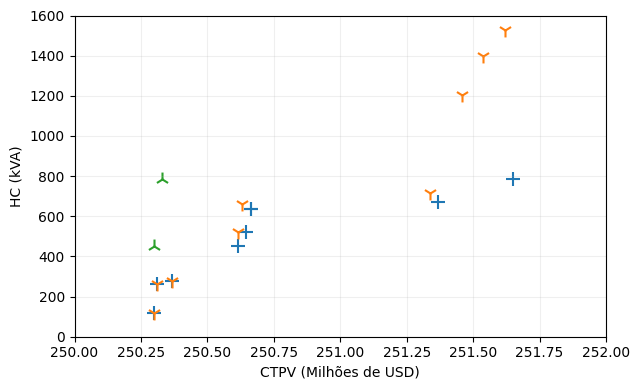

In [1973]:
fig, ax = plt.subplots(figsize=(6.5, 4), layout="tight", dpi=100)
ax.set_xlabel(ctpv_label)
ax.set_ylabel(hc_label)
ax.set_xlim((250, 252))
ax.set_ylim((0, 1600))
ax.grid(alpha=0.2)
ax.scatter(df_both[ctpv_label], df_both[hc_label], label="Both", marker="+", s=100)
ax.scatter(
    df_ev[ctpv_label], df_ev[hc_label], label="Only for EV/Loads", marker="1", s=100
)
ax.scatter(df_gen[ctpv_label], df_gen[hc_label], label="Only for DG", marker="2", s=100)
ax.scatter([-999], [-999], label="Solution number", marker="$n$", color="k", s=16) # for legend

### Annotations

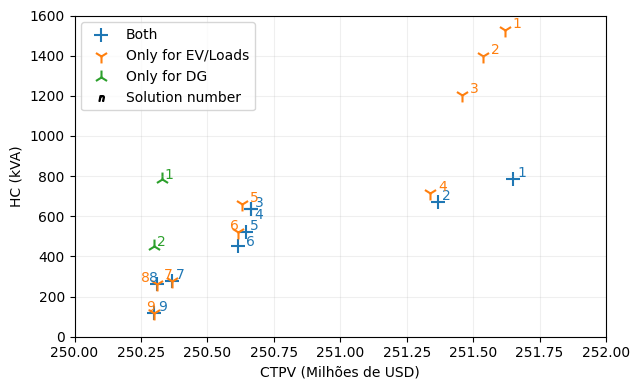

In [1926]:
for i in range(0, len(df_both)):
    x = df_both[ctpv_label].iloc[i]
    y = df_both[hc_label].iloc[i]
    n = i+1
    dx = 0.015
    dy = 10
    if n == 4:
        dy = -50
    if n == 6:
        dy = 0
        dx = 0.030
    if n == 8:
        dx = -0.030
    ax.annotate(n, xy=(x, y), xytext=(x + dx, y + dy), color="#1f77b4")
for i in range(0, len(df_ev)):
    x = df_ev[ctpv_label].iloc[i]
    y = df_ev[hc_label].iloc[i]
    n = i+1
    dx = 0.030
    dy = 10
    if n == 6:
        dx = -0.030
    if n >= 7:
        dx = -0.030
    if n == 8:
        dx = -0.060
    ax.annotate(n, xy=(x, y), xytext=(x + dx, y + dy), color="#ff7f0e")
for i in range(0, len(df_gen)):
    x = df_gen[ctpv_label].iloc[i]
    y = df_gen[hc_label].iloc[i]
    n = i+1
    dx = 0.01
    dy = 0.01
    ax.annotate(n, xy=(x, y), xytext=(x + dx, y + dy), color="#2ca02c")
ax.legend()
fig

In [1927]:
from dataclasses import dataclass
@dataclass
class Line:
    category: str
    bus1: int
    bus2: int
    alternative: int
    time: int

@dataclass
class DG:
    category: str
    bus: int
    alternative: int
    time: int

@dataclass
class Substation:
    category: str
    bus: int
    alternative: int
    time: int

@dataclass
class System:
    nnodes: int
    lines: list[Line]
    dgs: list[DG]
    substations: list[Substation]

def parser_system(path: str, nnodes: int) -> System:
    lines = []
    
    with open(path, "r") as file:
        lines = file.readlines()

    sys = System(nnodes, [],[],[])

    keep_print = False
    variable = ""
    for line in lines:
        if len(line) < 2:
            continue
        if line[-2] == ":":
            if "y" in line:
                keep_print = True
                variable = line[0:len(line)-2]
                continue
            else:
                keep_print = False
                continue

        if keep_print:
            data = line.split(",")
            value = data[-1]
            data[-1] = value.split(":")[0]       

            value = value.split(":")[1]
            value = bool(int(value[0:len(value)-2]))

            if value:            
                if "yˡ" in variable:
                    obj = Line(data[0], int(data[1]), int(data[2]), int(data[3]), int(data[4]))
                    sys.lines.append(obj)
                elif "yᵖ" in variable:
                    obj = DG(data[0], int(data[1]), int(data[2]), int(data[3]))
                    sys.dgs.append(obj)
                elif "yᵗʳ" in variable:
                    obj = Substation(data[0], int(data[1]), int(data[2]), int(data[3]))
                    sys.substations.append(obj)
                else:
                    raise RuntimeError(f"Unreacable: {variable}: {line}")
    
    return sys



In [1928]:
pos24 = {n: (0, 0) for n in range(1, 25)}
pos24[21] = (3, 6)
pos24[2]  = (4, 5)
pos24[12]  = (5, 5)

pos24[1]  = (2, 5)
pos24[14]  = (1, 5)
pos24[18]  = (1, 4)
pos24[24]  = (0, 3)
pos24[5]  = (1, 3)
pos24[20]  = (0, 2)

pos24[6]  = (2, 2)
pos24[13]  = (1, 1)
pos24[22]  = (3, 0)
pos24[17]  = (3, 1)
pos24[15]  = (3, 2)
pos24[8]  = (4, 1)
pos24[19]  = (4, 2)
pos24[4]  = (3, 3)
pos24[7]  = (5, 2)
pos24[11]  = (6, 1)
pos24[23]  = (6, 3)
pos24[10]  = (5, 3)
pos24[16]  = (4, 3)
pos24[3]  = (5, 4)
pos24[9]  = (3, 4)

pos24_sh = {n: (pos24[n][0], pos24[n][1] - 0.17) for n in range(1, 25)}


In [1929]:
import networkx as nx

def draw(name, sys, time, ax):
    G = nx.Graph()
    G.add_nodes_from(range(1, sys.nnodes + 1))
    edges = [(line.bus1, line.bus2) for line in sys.lines if line.time == time]
    labels = {(line.bus1, line.bus2): f"{line.category}{line.alternative}" for line in sys.lines if line.time == time}
    G.add_edges_from(edges)

    nx.draw_networkx_nodes(G, pos24, nodelist=[21, 22, 23, 24], node_shape='s', node_color="white", linewidths=0.5, edgecolors="black", ax=ax)
    nx.draw_networkx_nodes(G, pos24, nodelist=range(1, 21), node_shape='o', node_color="white",linewidths=0.5, edgecolors="black", ax=ax)
    nx.draw_networkx_labels(G, pos24, font_size=8, verticalalignment="center", ax=ax)
   

    nx.draw_networkx_edges(G, pos24, ax=ax)

    _ = nx.draw_networkx_edge_labels(G, pos24, labels, font_size=6, verticalalignment="center",
                                     rotate=False, label_pos=0.5, bbox=dict(alpha=1, color="white", edgecolor='none', pad=0),
                                     clip_on=False, ax=ax)


    G_gen = nx.Graph()
    G_gen.add_nodes_from([dg.bus for dg in sys.dgs if dg.time == time])
    labels_dg = {dg.bus:f"{dg.category}{dg.alternative}" for dg in sys.dgs if dg.time == time}

    labels_tr = {sub.bus:f"{sub.category}{sub.alternative}" for sub in sys.substations if sub.time == time}
    nx.draw_networkx_labels(G_gen, pos24_sh, labels=labels_dg, font_size=6, verticalalignment="center", ax=ax)
    nx.draw_networkx_labels(G_gen, pos24_sh, labels=labels_tr, font_size=6, verticalalignment="center", ax=ax)

## Generation 

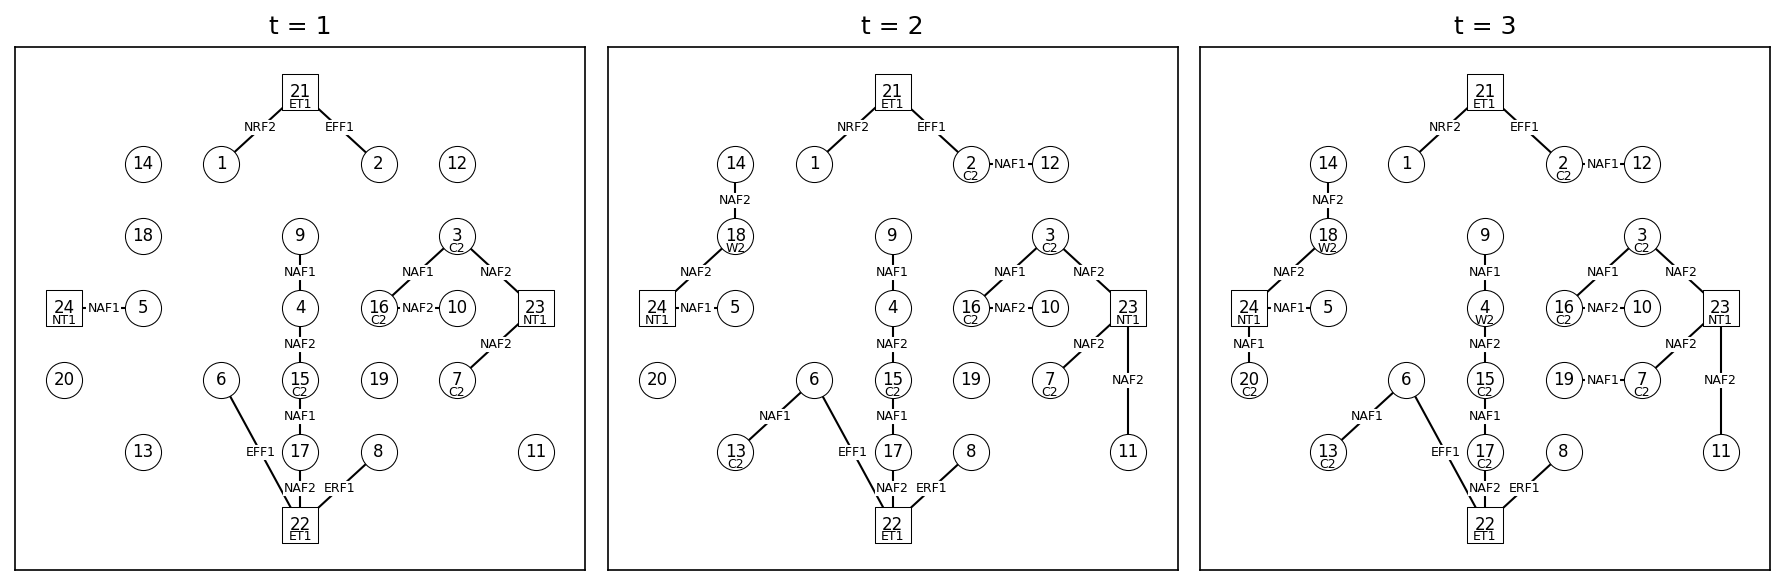

In [1965]:
sys = parser_system("../../solutions/24_bus_gen1.jump_sol", 24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(12, 4)
fig.set_tight_layout(True)
draw("sol1", sys, 1, ax1)
draw("sol1", sys, 2, ax2)
draw("sol1", sys, 3, ax3)

ax1.set_title('t = 1')
#ax1.axis("off")

ax2.set_title('t = 2')
#ax2.axis("off")

ax3.set_title('t = 3');
#ax3.axis("off")

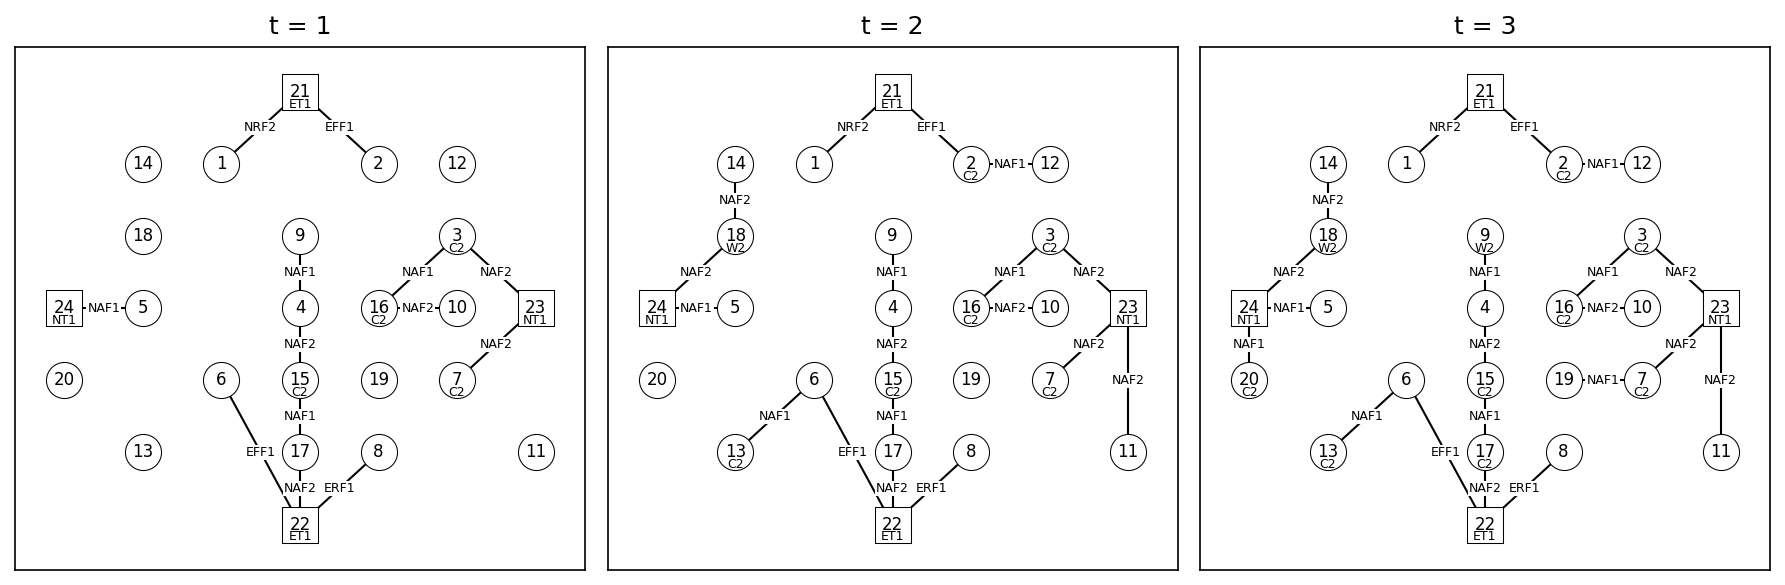

In [1966]:
sys = parser_system("../../solutions/24_bus_gen2.jump_sol", 24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(12, 4)
fig.set_tight_layout(True)
draw("sol1", sys, 1, ax1)
draw("sol1", sys, 2, ax2)
draw("sol1", sys, 3, ax3)

ax1.set_title('t = 1')
#ax1.axis("off")

ax2.set_title('t = 2')
#ax2.axis("off")

ax3.set_title('t = 3');

## Both

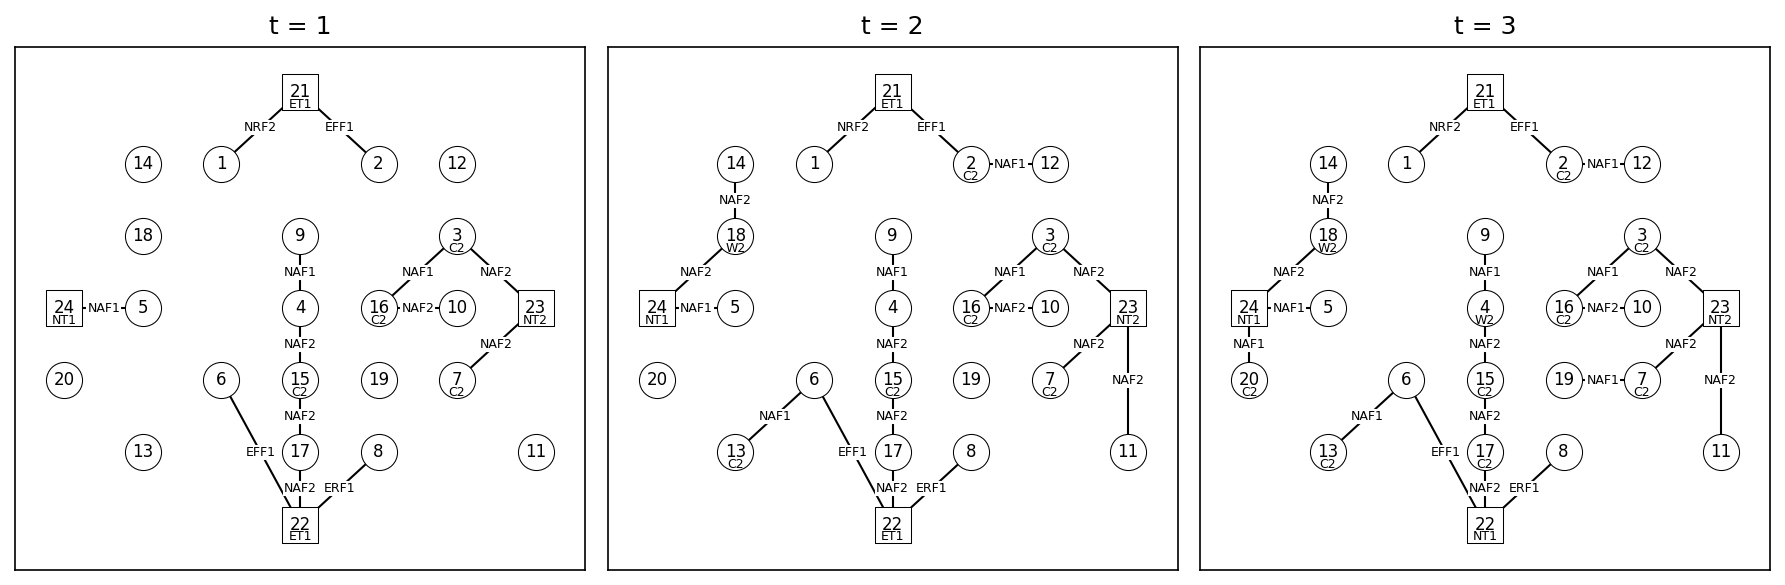

In [1967]:
sys = parser_system("../../solutions/24_bus_both1.jump_sol", 24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(12, 4)
fig.set_tight_layout(True)
draw("sol1", sys, 1, ax1)
draw("sol1", sys, 2, ax2)
draw("sol1", sys, 3, ax3)

ax1.set_title('t = 1')
#ax1.axis("off")

ax2.set_title('t = 2')
#ax2.axis("off")

ax3.set_title('t = 3');
#ax3.axis("off")

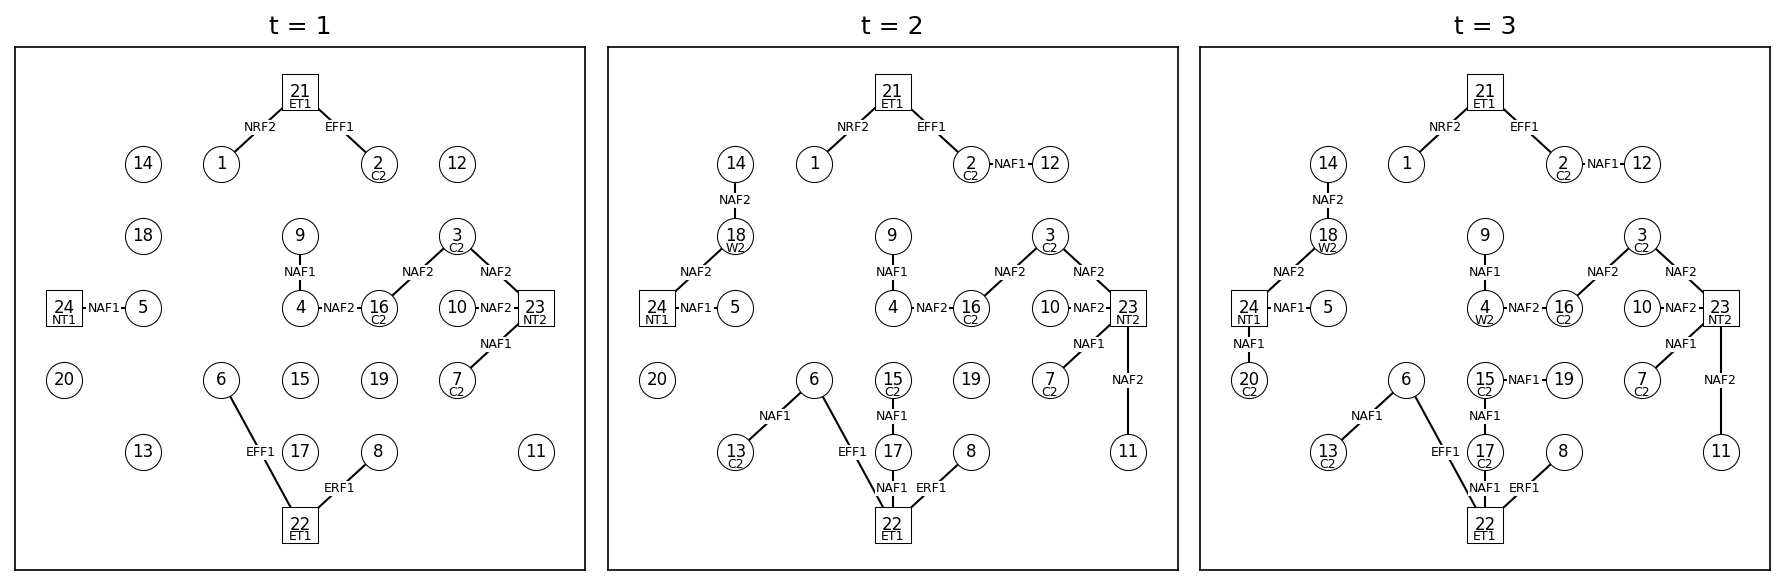

In [1971]:
sys = parser_system("../../solutions/24_bus_both4.jump_sol", 24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(12, 4)
fig.set_tight_layout(True)
draw("sol1", sys, 1, ax1)
draw("sol1", sys, 2, ax2)
draw("sol1", sys, 3, ax3)

ax1.set_title('t = 1')
#ax1.axis("off")

ax2.set_title('t = 2')
#ax2.axis("off")

ax3.set_title('t = 3');
#ax3.axis("off")

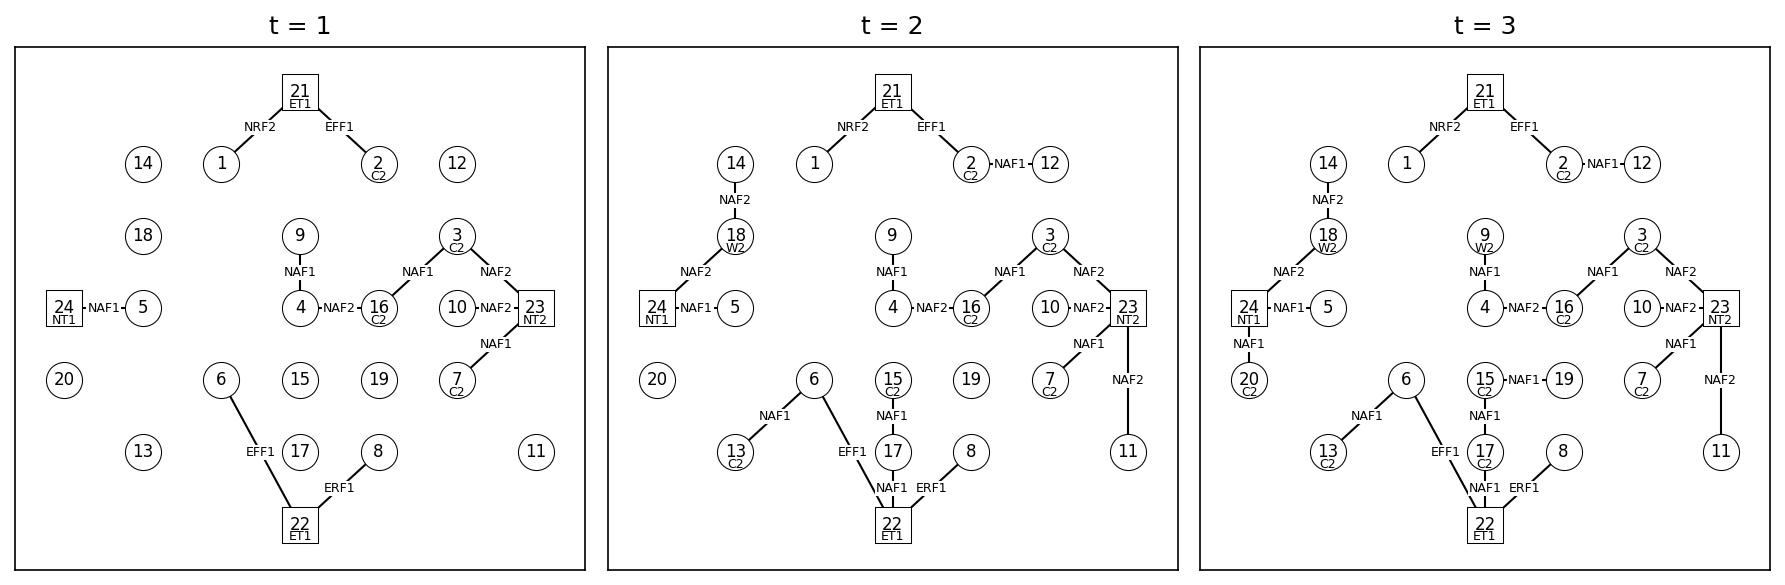

In [1970]:
sys = parser_system("../../solutions/24_bus_both6.jump_sol", 24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(12, 4)
fig.set_tight_layout(True)
draw("sol1", sys, 1, ax1)
draw("sol1", sys, 2, ax2)
draw("sol1", sys, 3, ax3)

ax1.set_title('t = 1')
#ax1.axis("off")

ax2.set_title('t = 2')
#ax2.axis("off")

ax3.set_title('t = 3');
#ax3.axis("off")

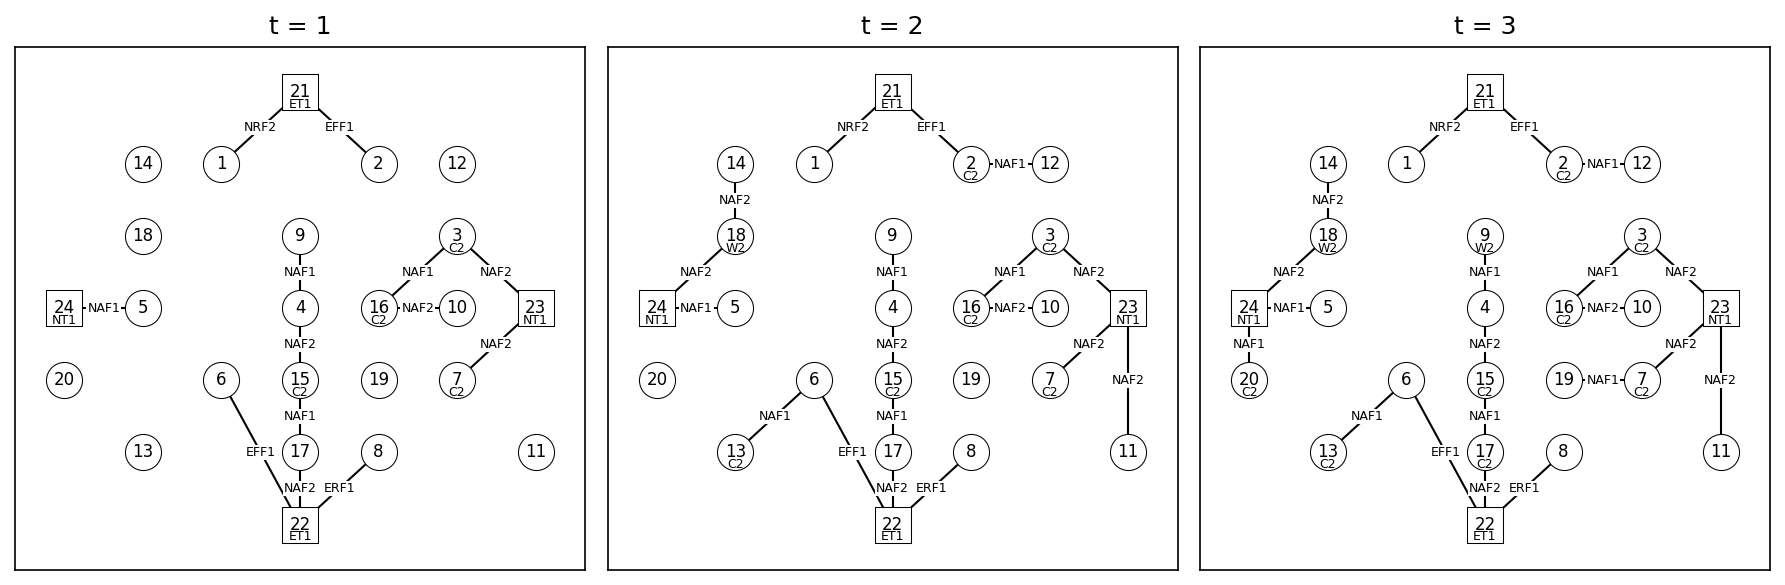

In [1968]:
sys = parser_system("../../solutions/24_bus_both9.jump_sol", 24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(12, 4)
fig.set_tight_layout(True)
draw("sol1", sys, 1, ax1)
draw("sol1", sys, 2, ax2)
draw("sol1", sys, 3, ax3)

ax1.set_title('t = 1')
#ax1.axis("off")

ax2.set_title('t = 2')
#ax2.axis("off")

ax3.set_title('t = 3');
#ax3.axis("off")